In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Black-body Spectrum of Earth

The reference radio spectrum of an Earth-sized planet is determined by the black-body radiation model which is only dependent on the average surface temperature of the source (which is a function of the size of the source). The surface temperature is on average around 288 K ([1](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law#Effective_Temperature_of_the_Earth)). But, depending on how one chooses to model the Earth the temperature can be as low as 255 K ([2](https://en.wikipedia.org/wiki/Black-body_radiation#Virtual_temperature_of_Earth)).

By the Stefan-Boltzmann law ([3](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law)) the total power radiated by a black-body is

$$P = A \epsilon \sigma T^4$$

where $A$ is the surface area of the source, $\epsilon$ is the emissivity, and $\sigma$ is the Stefan-Boltzmann constant

$$\sigma = 5.670373 \times 10^{-8} \textrm{W m}^{-2} \textrm{K}^{-4}$$

In [2]:
Tearth = 288. # Kelvin
Rearth = 6371000. # m, approximate
epsilon = 1. # for simplicity
Aearth = 4. * np.pi * Rearth**2. # Surface area of Earth, assuming a perfect sphere
sigma = 5.670373e-8 # W m^-2 K^-4, Stefan-Boltzman constant
Pearth = Aearth * epsilon * sigma * (Tearth**4.) # W
print 'By the Stefan-Boltzmann law the total power ouput of Earth is %e W'%Pearth

By the Stefan-Boltzmann law the total power ouput of Earth is 1.989787e+17 W


This is the total power, but the power is a function of frequency, the black-body of spectrum follows Planck's law ([4](https://en.wikipedia.org/wiki/Black-body_radiation#Planck.27s_law_of_black-body_radiation))

$$I(\nu, T) = \frac{2 h \nu^3}{c^2} \frac{1}{e^\frac{h \nu}{kT} - 1}$$

where $I$ is the spectral radiance of a source with a temperature $T$ at frequency $\nu$, $h$ is the Planck constant ([5](https://en.wikipedia.org/wiki/Planck_constant)), $c$ is the speed of light ([6](https://en.wikipedia.org/wiki/Speed_of_light)), and $k$ is the Boltzmann constant ([7](https://en.wikipedia.org/wiki/Boltzmann_constant)).

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: RuntimeWarning: overflow encountered in exp


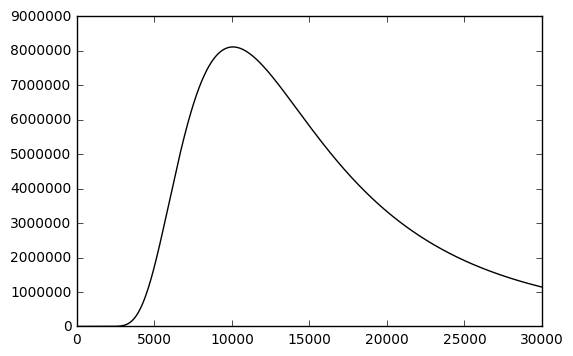

In [22]:
hh = 6.626070040e-34 # J s, Planck constant
cc = 299792458. # m /s, speeod of light in vacuum
kk = 1.38064852e-23 # J/K, Boltzmann constant

def planckLambda(wl, T):
    # Planck's law as a function of wavelength
    aa = 2. * hh * (cc**2.)
    bb = (hh * cc) / (wl * kk * T)
    return aa / ((wl**5.) * (np.exp(bb) - 1.))

def planckNu(nu, T):
    # Planck's law as a function of frequency
    aa = 2. * hh * (nu**3.) 
    bb = (hh * nu) / (kk * T)
    return aa / ((cc**2.) * (np.exp(bb) - 1.))

wavelengths = np.arange(1e-9, 3e-5, 1e-9)
freqs = cc / wavelengths

plt.plot(wavelengths*1e9, planckLambda(wavelengths, Tearth), 'k-')
#plt.plot(freqs, planckNu(freqs, 7000.), 'b-')

#### Rayleigh–Jeans law

We can use the Rayleigh–Jeans law to approximate the spectrum at low frequency ([8](https://en.wikipedia.org/wiki/Rayleigh%E2%80%93Jeans_law)).

$$B_{\lambda} (T) = \frac{2 c k_B T}{\lambda^4}$$

or

$$B_{\nu} (T) = \frac{2 \nu^2 k_B T}{c^2}$$


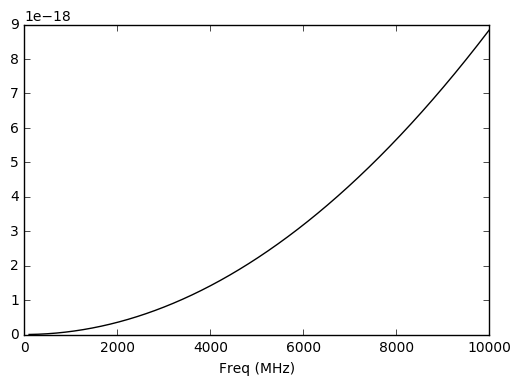

In [29]:
def rayleighJeansLambda(wl, T):
    # Rayleight-Jeans Law approximate to Planck's law
    return (2. * cc * kk * T) / (wls**4.)

def rayleighJeansNu(nu, T):
    # Rayleight-Jeans Law approximate to Planck's law
    return (2. * (nu**2.) * kk * T) / (cc**2.)

freqs = np.linspace(100., 10000, 1024) * 1e6
wavelengths = cc / freqs

plt.plot(freqs / 1e6, rayleighJeansNu(freqs, Tearth), 'k-')
plt.xlabel('Freq (MHz)')